In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

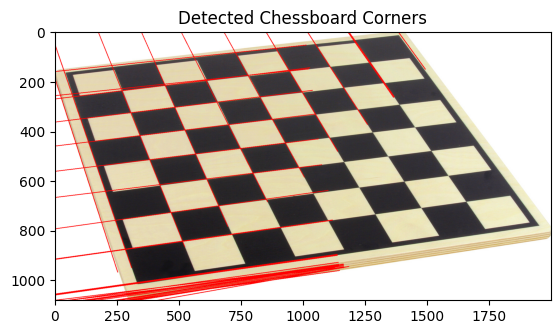

In [13]:
# img1 = cv2.imread(os.path.relpath('data/boards/black_board_difficult_corners.jpg'), cv2.IMREAD_COLOR)
image = cv2.imread(os.path.relpath('data/boards/board_tilted.jpg'), cv2.IMREAD_COLOR)

# 2. Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Apply Gaussian blur to reduce noise and detail (avoid detecting inner square corners)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 4. Perform edge detection using the Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

# 5. Use the Hough Line Transform to detect straight lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Create a copy of the image to draw lines and corners
output = image.copy()

# 6. Filter the lines to find the four outermost lines (this step requires some filtering heuristics)
# Group the lines by angle and position, and choose the four longest/most distinct lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 7. Find the intersection points of the lines (the corners of the chessboard)
def line_intersection(line1, line2):
    """Finds the intersection of two lines given in (x1, y1, x2, y2) form."""
    xdiff = (line1[0] - line1[2], line2[0] - line2[2])
    ydiff = (line1[1] - line1[3], line2[1] - line2[3])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return None  # Lines do not intersect

    d = (det((line1[0], line1[1]), (line1[2], line1[3])), det((line2[0], line2[1]), (line2[2], line2[3])))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

# Find intersections of the lines (assuming you identified the four key lines)
# corners = [line_intersection(line1, line2), ...]

# 8. Draw the detected corners on the image and display the result
# Assuming corners is a list of 4 (x, y) points representing the corners of the chessboard
if corners:
    for corner in corners:
        cv2.circle(output, tuple(map(int, corner)), radius=5, color=(0, 0, 255), thickness=-1)

# Display the result
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Detected Chessboard Corners')
plt.show()